<a href="https://colab.research.google.com/github/Ruswantomo/Praktikum-Data-Mining/blob/main/Ruswantomo_118_C2_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [2]:
import pandas as pd
import seaborn as sns

In [4]:
# Untuk Membaca Dataset Market Basket
df = pd.read_csv('dataset_market_basket.csv')


In [ ]:
# Lihat Data Tabular item
df

,whole milk,pasrty,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# 1 Item Set
df.sum()

whole milk             5
pasrty                 1
salty snack            2
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             4
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [6]:
# Item Pada Column 
df.columns

Index(['whole milk', 'pasrty', 'salty snack', 'sausage', 'semi-finished bread',
       'yogurt', 'soda', 'pickled vegetables', 'canned beer',
       'misc. beverages', 'hygiene articles', 'rolls/buns', 'frankfurter',
       'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter',
       'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar',
       'butter milk', 'specialty chocolate', 'frozen meals', 'dental care',
       'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

In [7]:
# 2 Item Set
from itertools import permutations

In [8]:
# Extract Unique Items
rules = list(permutations(df.columns, 2))
rules

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('

In [9]:
# Filter Item Kombinasi
rule2 = []
for rule in rules:
  # Memfilter dengan Nama Kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule2.append(rule)
rule2

[('whole milk', 'pasrty'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pasrty', 'whole milk'),
 ('pasrty', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pasrty'),
 ('salty snack', 'root vegetables'),
 ('salty snack', 'detergent'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hy

In [10]:
hitung = {} 
for rule in rule2:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('whole milk', 'pasrty')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pasrty', 'whole milk')": 1,
 "('pasrty', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pasrty')": 1,
 "('salty snack', 'root vegetables')": 1,
 "('salty snack', 'detergent')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('s

In [11]:
supp = [i/len(df)*100 for i in hitung.values()]
print(supp)
for item,support in hitung.items():
  print(f"{item} support = {round(support/len(df)*100)}%")

[5.263157894736842, 5.263157894736842, 10.526315789473683, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 10.526315789473683, 5.263157894736842, 5.263157894736842, 5.263157894736842, 10.526315789473683, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 10.526315789473683, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.263157894736842, 5.26315

In [12]:
for item,ab in hitung.items():
  i = eval(item)
  print(f"{i[0]}->{i[1]} Confidence = {ab/df[i[0]].sum()*100}%")

whole milk->pasrty Confidence = 20.0%
whole milk->salty snack Confidence = 20.0%
whole milk->sausage Confidence = 40.0%
whole milk->semi-finished bread Confidence = 20.0%
whole milk->yogurt Confidence = 20.0%
whole milk->soda Confidence = 20.0%
whole milk->rolls/buns Confidence = 20.0%
whole milk->butter Confidence = 20.0%
pasrty->whole milk Confidence = 100.0%
pasrty->salty snack Confidence = 100.0%
salty snack->whole milk Confidence = 50.0%
salty snack->pasrty Confidence = 50.0%
salty snack->root vegetables Confidence = 50.0%
salty snack->detergent Confidence = 50.0%
sausage->whole milk Confidence = 50.0%
sausage->semi-finished bread Confidence = 25.0%
sausage->yogurt Confidence = 25.0%
sausage->hygiene articles Confidence = 25.0%
sausage->rolls/buns Confidence = 50.0%
semi-finished bread->whole milk Confidence = 100.0%
semi-finished bread->sausage Confidence = 100.0%
semi-finished bread->yogurt Confidence = 100.0%
yogurt->whole milk Confidence = 100.0%
yogurt->sausage Confidence = 1

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

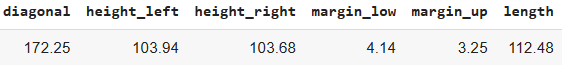
<!-- 1412 -->

In [13]:
# Untuk Membaca Dataset Deteksi Uang Palsu
df = pd.read_csv('deteksi_uang_palsu.csv')

In [14]:
# Lihat Data Tabular item
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [15]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

# Membaca dataset dari file CSV
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv('deteksi_uang_palsu.csv')

In [17]:
# Memisahkan fitur dan target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [18]:
# Menghitung jarak dari setiap data point ke target prediksi
distances = np.sqrt(np.sum((X - y.values.reshape(-1, 1)) ** 2, axis=1))
df['Jarak'] = distances

In [19]:
# Menyimpan hasil ke file CSV
df.to_csv('hasil_jarak.csv', index=False)

df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,200.285783
1,True,171.66,103.68,103.41,4.35,3.33,113.74,201.070850
2,True,172.23,104.00,103.35,4.43,2.95,113.12,200.485558
3,True,172.07,104.21,103.82,4.29,3.35,113.30,200.524023
4,True,171.79,104.57,104.04,4.26,3.15,113.46,200.774364
5,False,172.00,104.23,104.52,5.76,3.37,110.94,196.866414
6,False,171.56,104.03,103.93,5.47,3.50,111.67,197.874877
7,False,171.90,104.33,104.40,4.70,3.31,112.12,199.106750
8,False,171.84,104.06,104.10,4.87,3.25,111.04,197.520021
9,False,172.11,104.14,104.15,4.84,3.28,110.98,197.514206


In [20]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

# Membaca dataset dari file CSV
df = pd.read_csv('deteksi_uang_palsu.csv')

In [21]:
# Memisahkan fitur dan target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [22]:
# Menghitung jarak dari setiap data point ke target prediksi
distances = np.sqrt(np.sum((X - y.values.reshape(-1, 1)) ** 2, axis=1))

In [23]:
# Mengambil K jarak terdekat
K = int(np.sqrt(len(df)))
indices = np.argsort(distances)[:K]

In [24]:
# Mengurutkan data berdasarkan K jarak terdekat
df_sorted = df.iloc[indices].reset_index(drop=True)

In [25]:
# Menyimpan hasil ke file CSV
df_sorted.to_csv('sorted.csv', index=False)

In [26]:
# hasil file csv dari penambahan kolom jarak
df_sorted = pd.read_csv('sorted.csv')
df_sorted

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,False,172.00,104.23,104.52,5.76,3.37,110.94
1,False,172.11,104.14,104.15,4.84,3.28,110.98
2,False,171.84,104.06,104.10,4.87,3.25,111.04


In [27]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

# Load dataset
df = pd.read_csv("deteksi_uang_palsu.csv")

In [28]:
# Hitung jumlah masing-masing label
label_counts = df["is_genuine"].value_counts()

In [29]:
# Tampilkan label terbanyak
print("Label terbanyak adalah", label_counts.idxmax())

Label terbanyak adalah True


# (3) Analisis

> Nama : Ruswantomo

> Nim : 2109116118


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# Bussines Understanding

Pada tahap ini, kita akan memahami tujuan dari analisis dan bisnis yang terkait dengan dataset. Sebagai contoh, kita akan menggunakan dataset chocolate_makers.csv untuk mengetahui berapa banyak dan rating pabrik pembuat coklat ditiap kota, provinsi, daerah yang ada pada dataset tersebut

# Data Understanding

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("chocolate_makers.csv")

In [60]:
df

,COMPANY NAME,CITY,STATE/PROVINCE,OWNER/MAKER,COUNTRY
0,Choklat,Calgary,Alberta,Brad Churchill,Canada
1,Yukon Chocolate Company,Calgary,Alberta,Sydney Oland,Canada
2,Kin+Pod,Calgary,Alberta,Georden Spicer,Canada
3,Goldie,Calgary,Alberta,Amy Horne (instagram),Canada
4,Moth Chocolate,Calgary,Alberta,Geordan Spicer (mothchocolate.com),Canada
...,...,...,...,...,...
368,Tabal,Milwaukee,Wisconsin,Dan Bieser,US
369,Sjolinds,Mount Horeb,Wisconsin,Tracy Thompson,US
370,Del Sol,Viroqua,Wisconsin,Lynn Kronschnabel,US
371,Roots,Wisconsin Dells,Wisconsin,Lisa Nelson,US


In [61]:
# Menampilkan 5 baris pertama dari dataset
print(df.head())

              COMPANY NAME     CITY STATE/PROVINCE  \
0                  Choklat  Calgary        Alberta   
1  Yukon Chocolate Company  Calgary        Alberta   
2                  Kin+Pod  Calgary        Alberta   
3                   Goldie  Calgary        Alberta   
4           Moth Chocolate  Calgary        Alberta   

                          OWNER/MAKER COUNTRY  
0                      Brad Churchill  Canada  
1                        Sydney Oland  Canada  
2                      Georden Spicer  Canada  
3               Amy Horne (instagram)  Canada  
4  Geordan Spicer (mothchocolate.com)  Canada  


In [62]:
df.tail()

,COMPANY NAME,CITY,STATE/PROVINCE,OWNER/MAKER,COUNTRY
368,Tabal,Milwaukee,Wisconsin,Dan Bieser,US
369,Sjolinds,Mount Horeb,Wisconsin,Tracy Thompson,US
370,Del Sol,Viroqua,Wisconsin,Lynn Kronschnabel,US
371,Roots,Wisconsin Dells,Wisconsin,Lisa Nelson,US
372,Deity Chocolate,Cody,Wyoming,Erin and Jake Robertson,US


In [66]:
# df1 isinya dataset dengan label target US
df1 = df[df['COUNTRY'] == 'US']

# Menampilkan hasil filter
print(df1)

           COMPANY NAME             CITY STATE/PROVINCE  \
57                Match       Birmingham        Alabama   
58   Wildland Chocolate        Anchorage         Alaska   
59             Nutwhats         Chandler        Arizona   
60                  DNA         Chandler        Arizona   
61             Chocofin   Fountain Hills        Arizona   
..                  ...              ...            ...   
368               Tabal        Milwaukee      Wisconsin   
369            Sjolinds      Mount Horeb      Wisconsin   
370             Del Sol          Viroqua      Wisconsin   
371               Roots  Wisconsin Dells      Wisconsin   
372     Deity Chocolate             Cody        Wyoming   

                 OWNER/MAKER COUNTRY  
57             Kala Northrup      US  
58         Jimmy and Suzanne      US  
59         Lisa and Jim Rast      US  
60           Denae Hostetler      US  
61             Lou Mirabella      US  
..                       ...     ...  
368               

In [67]:
# df2 isinya dataset dengan label target bukan US
df2 = df[df['COUNTRY'] != 'US']

# Menampilkan hasil filter
print(df2)

                       COMPANY NAME              CITY    STATE/PROVINCE  \
0                           Choklat           Calgary           Alberta   
1           Yukon Chocolate Company           Calgary           Alberta   
2                           Kin+Pod           Calgary           Alberta   
3                            Goldie           Calgary           Alberta   
4                    Moth Chocolate           Calgary           Alberta   
5                       Ten Degrees           Calgary           Alberta   
6           The Jones Chocolate Co.          Edmonton           Alberta   
7                       Au Chocolat        Morinville           Alberta   
8                             Jacek     Sherwood Park           Alberta   
9                      Take a Fancy           Burnaby  British Columbia   
10                      Organicfair       Cobble Hill  British Columbia   
11                           Kasama    East Vancouver  British Columbia   
12                       

In [69]:
# df3 isinya dataset dengan label target Milwaukee
df3 = df[df['CITY'] == 'Milwaukee']

# Menampilkan hasil filter
print(df3)

    COMPANY NAME       CITY STATE/PROVINCE     OWNER/MAKER COUNTRY
367   Indulgence  Milwaukee      Wisconsin  Julie Waterman      US
368        Tabal  Milwaukee      Wisconsin      Dan Bieser      US


##describe data

In [70]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 367 to 368
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   COMPANY NAME    2 non-null      object
 1   CITY            2 non-null      object
 2   STATE/PROVINCE  2 non-null      object
 3   OWNER/MAKER     2 non-null      object
 4   COUNTRY         2 non-null      object
dtypes: object(5)
memory usage: 96.0+ bytes


In [72]:
df3.describe()

,COMPANY NAME,CITY,STATE/PROVINCE,OWNER/MAKER,COUNTRY
count,2,2,2,2,2
unique,2,1,1,2,1
top,Indulgence,Milwaukee,Wisconsin,Julie Waterman,US
freq,1,2,2,1,2


##Explore Data

##Visualisasi Comparison

In [73]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

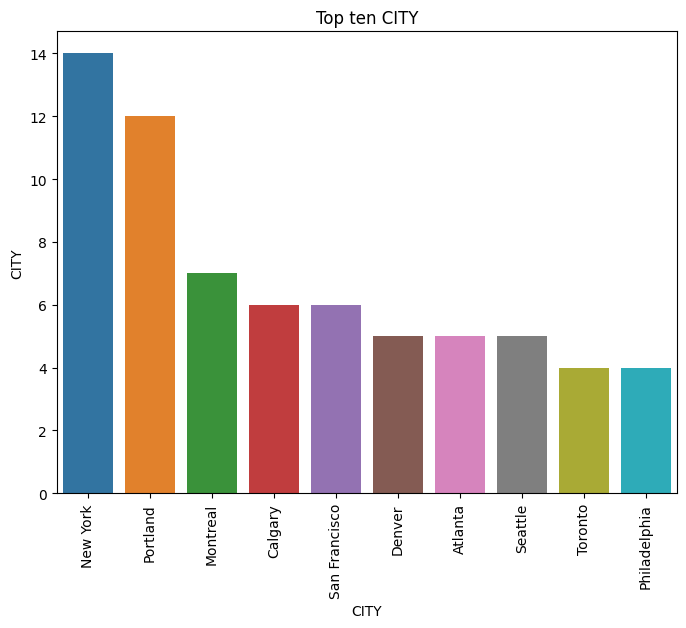

In [74]:
country_count = Counter(df['CITY'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top ten CITY')
plt.xlabel('CITY')
plt.ylabel('CITY')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [78]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 COMPANY NAME      0
CITY              0
STATE/PROVINCE    0
OWNER/MAKER       3
COUNTRY           0
dtype: int64


In [79]:
# Check for duplicates
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [80]:
# Check for outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

Outliers:
 COMPANY NAME      0
CITY              0
STATE/PROVINCE    0
OWNER/MAKER       0
COUNTRY           0
dtype: int64


<ipython-input-80-650d731e3b3f>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


In [81]:
# Check data types
print("Data types:\n", df.dtypes)

Data types:
 COMPANY NAME      object
CITY              object
STATE/PROVINCE    object
OWNER/MAKER       object
COUNTRY           object
dtype: object


##select data

# Data Preparation

In [82]:
import pandas as pd

In [83]:
df = pd.read_csv("chocolate_makers.csv")

In [84]:
# Membuat hanya menampikan 2 Kolom
selected_data = df[["COMPANY NAME", "CITY"]]

# Menampilkan Perintah
print(selected_data.head())

              COMPANY NAME     CITY
0                  Choklat  Calgary
1  Yukon Chocolate Company  Calgary
2                  Kin+Pod  Calgary
3                   Goldie  Calgary
4           Moth Chocolate  Calgary


In [85]:
# Membuat hanya menampikan 3 Kolom
selected_data = df[["COMPANY NAME", "CITY", "STATE/PROVINCE"]]

# Menampilkan Perintah
print(selected_data.head())

              COMPANY NAME     CITY STATE/PROVINCE
0                  Choklat  Calgary        Alberta
1  Yukon Chocolate Company  Calgary        Alberta
2                  Kin+Pod  Calgary        Alberta
3                   Goldie  Calgary        Alberta
4           Moth Chocolate  Calgary        Alberta


##clean data

In [86]:
df.isna().sum()

COMPANY NAME      0
CITY              0
STATE/PROVINCE    0
OWNER/MAKER       3
COUNTRY           0
dtype: int64

In [87]:
df.isna().sum() / len(df) * 100

COMPANY NAME      0.00000
CITY              0.00000
STATE/PROVINCE    0.00000
OWNER/MAKER       0.80429
COUNTRY           0.00000
dtype: float64

##construct data

In [88]:
import pandas as pd

In [89]:
df = pd.read_csv("chocolate_makers.csv")

In [90]:
df

,COMPANY NAME,CITY,STATE/PROVINCE,OWNER/MAKER,COUNTRY
0,Choklat,Calgary,Alberta,Brad Churchill,Canada
1,Yukon Chocolate Company,Calgary,Alberta,Sydney Oland,Canada
2,Kin+Pod,Calgary,Alberta,Georden Spicer,Canada
3,Goldie,Calgary,Alberta,Amy Horne (instagram),Canada
4,Moth Chocolate,Calgary,Alberta,Geordan Spicer (mothchocolate.com),Canada
...,...,...,...,...,...
368,Tabal,Milwaukee,Wisconsin,Dan Bieser,US
369,Sjolinds,Mount Horeb,Wisconsin,Tracy Thompson,US
370,Del Sol,Viroqua,Wisconsin,Lynn Kronschnabel,US
371,Roots,Wisconsin Dells,Wisconsin,Lisa Nelson,US


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   COMPANY NAME    373 non-null    object
 1   CITY            373 non-null    object
 2   STATE/PROVINCE  373 non-null    object
 3   OWNER/MAKER     370 non-null    object
 4   COUNTRY         373 non-null    object
dtypes: object(5)
memory usage: 14.7+ KB


In [92]:
cols_no_na = df3.columns[df3.isna().sum(axis=0) == 0]
cols_with_na = df3.columns[df3.isna().sum(axis=0) > 0]

print("Columns with no missing value:", cols_no_na)
print("Columns with missing values:", cols_with_na)

Columns with no missing value: Index(['COMPANY NAME', 'CITY', 'STATE/PROVINCE', 'OWNER/MAKER', 'COUNTRY'], dtype='object')
Columns with missing values: Index([], dtype='object')


In [93]:
df3[df3.isna().sum(axis=1) > 0]

,COMPANY NAME,CITY,STATE/PROVINCE,OWNER/MAKER,COUNTRY
